<a target="_blank" href="https://colab.research.google.com/github/alejandrogtz/cccs630-fall2023/blob/main/module10/markov_models.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov Models

## Introduction

In this module, we will explore a different type of model, a Markov model. Markov models are useful for studying the behaviour or decisions of actors or agents in a complex system. 

In preparation for the interaction portion, please watch the following video published by Harvard Online.

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/JHwyHIz6a8A" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Concepts

You will find a list of important concepts we will review in the module below.

- Markov model
- Markov chain
- Transition matrix

## Interaction

"Markov created a way to describe how random, also called stochastic, systems or processes evolve over time."
"The system is modeled as a sequence of states and, as time goes by, it moves in between states with a specific probability. Since the states are connected, they form a chain"
"The transitions between states are conditioned, or dependent, on the state you are in before the transition occurs.""
"A Markov chain is simplest type of Markov model[1]"
"A Markov chain has short-term memory, it only remembers where you are now and where you want to go next."

Applications

Model language


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation

In [3]:
rc('animation', html='html5') # Specify the type of animation to be rendered.

In [4]:
data = pd.read_excel('module09_data.xlsx', sheet_name='data') # Load the data into Jupyter

In [5]:
panelist_ids = data.groupby('panelist_id').size().reset_index(name='counts') # Group users by ID

In [6]:
panelist_ids

,panelist_id,counts
0,1,4453
1,1137,3593


In [7]:
"""
Adjust the panelist_id value to select the user you want to analyze
"""
user_data = data[data['panelist_id'] == 1137] # Filter a single user 

In [8]:
user_data

,id,prev_id,panelist_id,used_at,left_at,active_seconds,top_level_domain,category1,category2,category3
4453,1012622516,0,1137,2018-10-01 17:15:45,2018-10-01 17:15:57,12,facebook.com,social-networking,NaN,NaN
4454,1012622520,1012622516,1137,2018-10-01 17:15:57,2018-10-01 17:15:59,2,facebook.com,social-networking,NaN,NaN
4455,1012622524,1012622520,1137,2018-10-01 17:15:59,2018-10-01 17:16:09,10,facebook.com,social-networking,NaN,NaN
4456,1012622528,1012622524,1137,2018-10-01 17:16:09,2018-10-01 17:16:13,4,facebook.com,social-networking,NaN,NaN
4457,1012622532,1012622528,1137,2018-10-01 17:16:13,2018-10-01 17:16:19,6,facebook.com,social-networking,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8041,1092165015,1092165011,1137,2018-10-30 23:08:03,2018-10-30 23:08:07,4,youtube.com,entertainment,streaming-media,NaN
8042,1092165019,1092165015,1137,2018-10-30 23:08:07,2018-10-30 23:09:13,66,facebook.com,social-networking,NaN,NaN
8043,1092165023,1092165019,1137,2018-10-30 23:09:13,2018-10-30 23:09:33,20,facebook.com,social-networking,NaN,NaN
8044,1092165027,1092165023,1137,2018-10-30 23:09:33,2018-10-30 23:10:11,38,youtube.com,entertainment,streaming-media,NaN


In [9]:
categories = user_data.groupby('category1').size().reset_index(name='counts') # Group records by category1

In [10]:
"""
Enter the number of categories you want to use
"""
markov_states = 5

In [11]:
# Select the top categories based on the desidered number of markov states
categories = categories.sort_values(by=['counts'], ascending=False).head(markov_states)

In [12]:
categories

,category1,counts
7,social-networking,1519
2,entertainment,1170
1,business,622
6,shopping,242
5,search-engines and portals,20


In [13]:
nodes = categories['category1'].tolist()

In [14]:
nodes

['social-networking',
 'entertainment',
 'business',
 'shopping',
 'search-engines and portals']

In [15]:
# Convert the sequential data into a data structure that can be used to create a network model
connections = {
    'start_node': [],
    'end_node': []
}

for index, row in user_data.iterrows():
    
    record = user_data.loc[user_data['prev_id'] == row['id']]
    
    if (len(record)>0):
        if (row['category1'] in nodes) & (record.iloc[0]['category1'] in nodes):
            connections['start_node'].append(row['category1'])
            connections['end_node'].append(record.iloc[0]['category1'])

In [16]:
connections

{'start_node': ['social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'entertainment',
  'entertainment',
  'entertainment',
  'entertainment',
  'entertainment',
  'entertainment',
  'entertainment',
  'entertainment',
  'social-networking',
  'entertainment',
  'entertainment',
  'social-networking',
  'entertainment',
  'social-networking',
  'social-networking',
  'social-networking',
  'entertainment',
  'social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'social-networking',
  'entertainment',
  'social-networking',
  'social-networking',
  'entertainment',
  'social-networking',
  'entertainment',
  'entertainment',
  'entertainment',
  'entertainment',
  'entertainment',
  'entertainment',
  'entertainment',
  'entertain

In [17]:
connections = pd.DataFrame.from_dict(connections) # Create a dataframe from a dictionary

In [18]:
connections

,start_node,end_node
0,social-networking,social-networking
1,social-networking,social-networking
2,social-networking,social-networking
3,social-networking,social-networking
4,social-networking,social-networking
...,...,...
3557,social-networking,entertainment
3558,entertainment,social-networking
3559,social-networking,social-networking
3560,social-networking,entertainment


In [19]:
connections = connections.groupby(['start_node','end_node']).size().reset_index(name='count')

In [20]:
connections

,start_node,end_node,count
0,business,business,425
1,business,entertainment,144
2,business,search-engines and portals,5
3,business,shopping,7
4,business,social-networking,40
5,entertainment,business,143
6,entertainment,entertainment,538
7,entertainment,search-engines and portals,6
8,entertainment,shopping,61
9,entertainment,social-networking,419


In [21]:
# Create a directional graph
G = nx.DiGraph()

# Add nodes and connections to the graph
for index, row in connections.iterrows():
    if (not G.has_node(row['start_node'])):
        G.add_node(row['start_node'])
    if (not G.has_node(row['end_node'])):
        G.add_node(row['end_node'])
    G.add_edge(row['start_node'],row['end_node'], weight=row['count'])

In [22]:
print('Nodes: ',G.number_of_nodes())

Nodes:  5


In [23]:
print('Edges: ',G.number_of_edges())

Edges:  24


In [24]:
pos = nx.spiral_layout(G)

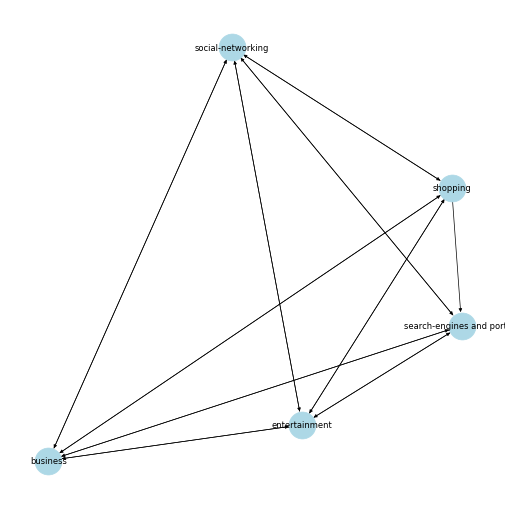

In [25]:
fig = plt.figure(1, figsize=(10, 10), dpi=50)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='normal', node_size=1500, width=1)

In [26]:
nx.degree_centrality(G)

{'business': 2.5,
 'entertainment': 2.5,
 'search-engines and portals': 2.25,
 'shopping': 2.25,
 'social-networking': 2.5}

In [27]:
nx.betweenness_centrality(G)

{'business': 0.027777777777777776,
 'entertainment': 0.027777777777777776,
 'search-engines and portals': 0.0,
 'shopping': 0.0,
 'social-networking': 0.027777777777777776}

In [28]:
nx.closeness_centrality(G)

{'business': 1.0,
 'entertainment': 1.0,
 'search-engines and portals': 1.0,
 'shopping': 0.8,
 'social-networking': 1.0}

In [29]:
transition_matrix = np.zeros((len(nodes), len(nodes))) 

In [30]:
transition_matrix

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [31]:
for i in range(len(nodes)):

    total = connections[connections['start_node'] == nodes[i]]['count'].sum()
    for x in range(len(nodes)):
        
        w = connections[(connections['start_node'] == nodes[i]) & (connections['end_node'] == nodes[x])]['count'].head(1)
        value = w.tolist()
        if (len(value)>0):
            transition_matrix[i,x] = value[0]/total

conditional probabilities or transition probabilities

In [47]:
transition_matrix

array([[0.68650794, 0.28373016, 0.02116402, 0.00595238, 0.0026455 ],
       [0.35904027, 0.46101114, 0.12253642, 0.05227078, 0.00514139],
       [0.06441224, 0.23188406, 0.68438003, 0.01127214, 0.00805153],
       [0.05785124, 0.22727273, 0.03305785, 0.67768595, 0.00413223],
       [0.05      , 0.1       , 0.65      , 0.        , 0.2       ]])

In [48]:
class MarkovChain:
    def __init__(self, transition_matrix, states):
        self.transition_matrix = np.array(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in range(len(self.states))}

    def next_state(self, current_state):
        return np.random.choice(
            self.states, 
            p=self.transition_matrix[self.index_dict[current_state], :]
        )

    def generate_states(self, current_state, no=10):
        future_states = []
        for i in range(no):
            next_st = self.next_state(current_state)
            future_states.append(next_st)
            current_state = next_st
        return future_states

In [49]:
states = nodes

In [50]:
markov_chain = MarkovChain(transition_matrix=transition_matrix, states=states)

In [51]:
initial_state = 'business'

In [52]:
print("Next state after", initial_state, ":", markov_chain.next_state(current_state=initial_state))

Next state after business : business


In [66]:
"""
Enter the number of steps you want to simulate
"""
steps = 100

In [67]:
simulation_results = markov_chain.generate_states(current_state=initial_state, no=steps)

In [68]:
print("Next,", steps, "states starting from", initial_state ,":", simulation_results)

Next, 100 states starting from business : ['entertainment', 'business', 'business', 'shopping', 'shopping', 'shopping', 'entertainment', 'social-networking', 'entertainment', 'entertainment', 'entertainment', 'entertainment', 'entertainment', 'social-networking', 'social-networking', 'entertainment', 'entertainment', 'entertainment', 'entertainment', 'social-networking', 'social-networking', 'social-networking', 'social-networking', 'entertainment', 'entertainment', 'entertainment', 'entertainment', 'social-networking', 'entertainment', 'social-networking', 'entertainment', 'entertainment', 'social-networking', 'social-networking', 'social-networking', 'social-networking', 'social-networking', 'social-networking', 'social-networking', 'social-networking', 'entertainment', 'business', 'business', 'business', 'business', 'entertainment', 'entertainment', 'business', 'business', 'entertainment', 'entertainment', 'entertainment', 'entertainment', 'shopping', 'shopping', 'entertainment', 'e

How likely the user will go to a determined state assume we start in state X
Assuming a 3 changes of states, how likely we will see a certain combination.


In [69]:
distributions = np.zeros((steps, len(states))) 

In [70]:
cont = 0
for x in simulation_results:
    if (cont>0):
        distributions[cont][:] = distributions[cont-1][:]
    index = nodes.index(x)
    distributions[cont][index] = distributions[cont][index]+1
    cont = cont+1

In [71]:
distributions[steps-1]

array([36., 36., 23.,  5.,  0.])

In [74]:
y_limit = max(distributions[steps-1])

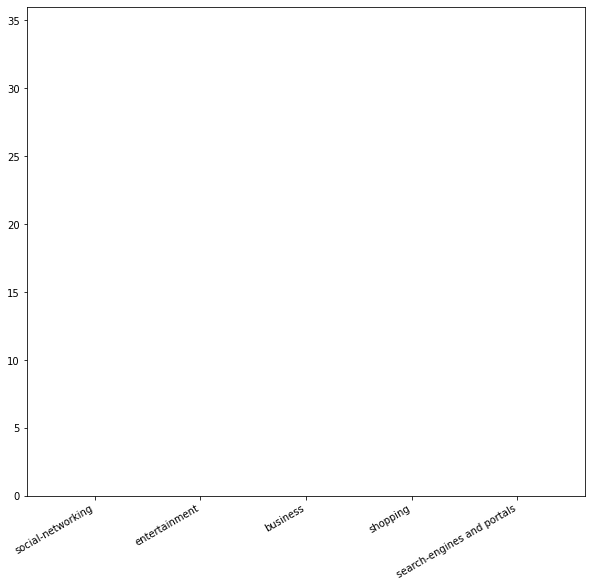

In [75]:
plt.rcParams['savefig.facecolor'] = 'white' # Eliminates the distortion of the graph text

fig, ax = plt.subplots(figsize=(10,9))

N = len(states) # Number of bars

data = np.zeros(len(states)) # Initial data

bars = ax.bar(states, data) # Setting up the bar chart

ax.tick_params(axis='x', labelrotation=30)
# Eventually, this shouldn't be needed and an `ha` argument should
# be available for the above.
plt.xticks(ha='right')

ax.set_ylim(0, y_limit) # Set the axis limits

step = [0] # Keep track of the frame (chart) we want to visualize 

def update(frame, step):

    data = distributions[step[0]][:] 

    for bar, h in zip(bars, data):
        bar.set_height(h)
        
    step[0] += 1  # Increase the step value by 1
    return bars

ani = FuncAnimation(fig, update, frames=steps-1, interval=100, fargs=(step,), repeat=False) # Create the animation

In [76]:
# Display the animation.
ani

## Assignment 

### Conceptual Option

Pending.

### Hands-on Option

Pending.

Adjust the number of states or nodes.

## Recommended Readings

Pending.

## Optional Readings

You will find additional resources in case you would like to continue exploring the topics covered in this module below.

Pending.